# **Aviation Business Analysis**






## Business Problem

## Overview

The aim of the project is to conduct analysis for a business looking to diversify its portfolio into the aviation industry. They are particularly interested in purchasing and operating airplanes for commercial and private enterprises.

The dataset is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United State International waters.

The findings will help the company mitigate potential risks and make informed decisions about aircraft purchases, ensuring a safe and strategic entry into the aviation market.

The company is expanding into the aviation industry to diversify its portfolio by acquiring and operating aircraft for profit-driven ventures. The company needs to broaden its understanding of the aviation business and the potential risks associated with various aircraft. This analysis aims to answer several questions, including which areas of the aviation business to consider, which aircraft pose the lowest risk, and what factors contribute to assessed safety.

## Data Used

The [National Transportation Safety Board aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. Detailed accidents reports can be accessed on [NTSB website](https://www.ntsb.gov/Pages/AviationQueryV2.aspx).

## Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = '/content/AviationData.csv'
df = pd.read_csv(file_path, encoding='latin1')

<ipython-input-2-8e8129a8525e>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


## Understanding the Data

In [ ]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [ ]:
df.shape


(88889, 31)

In [ ]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning

The process of data cleaning will involve multiple steps, each aimed at removing redundant data and formatting the dataframe into a more user-friendly structure These steps include:
* Handling missing values
* Deleting duplicates
* Changing data types

In [ ]:
# Cleaning columns formatting
df.columns = df.columns.str.replace('.', ' ').str.strip()

# Deleting unnecessary columns
df = df.drop(columns=['Investigation Type', 'Accident Number', 'Latitude', 'Longitude', 'Airport Code', 'Registration Number', 'FAR Description', 'Schedule', 'Report Status', 'Publication Date'])

In [ ]:
# Deleting duplicate rows by unique ID

df = df.groupby('Event Id').first().reset_index()

In [ ]:
# Changing data type for Date column

df['Event Date'] = pd.to_datetime(df['Event Date'])

In [ ]:
# Excluding Amateur Built aircrafts

df = df[df['Amateur Built'] == 'No']

In [ ]:
# Cleaning Make column formatting

df['Make'] = df['Make'].str.title()

for word in [".", "Ltd", "Inc", "Air", "Company", "Co", "Helicopter", "Design", "rp"]:
    df['Make'] = df['Make'].str.replace(word, ' ').str.strip()

In [ ]:
# Split location in city and state columns

df['City'] = df['Location'].str.split(',').str[0].str.title()
df['State'] = df['Location'].str.split(',').str[1]

In [ ]:
df['Purpose of flight'].unique()

array(['Unknown', 'Personal', 'Executive/corporate', 'Business',
       'Instructional', 'Public Aircraft', 'Positioning',
       'Aerial Application', 'Aerial Observation', None, 'Other Work Use',
       'Ferry', 'Skydiving', 'Flight Test', 'Air Race/show', 'Air Drop',
       'Glider Tow', 'Public Aircraft - Federal',
       'Public Aircraft - Local', 'External Load', 'Banner Tow',
       'Public Aircraft - State', 'Firefighting', 'Air Race show', 'PUBS',
       'ASHO', 'PUBL'], dtype=object)

In [ ]:
#Add a day, month & year columns

df['Year'] = df['Event Date'].dt.year
df['Month'] = df['Event Date'].dt.month
df['Day'] = df['Event Date'].dt.day

In [ ]:
df.isnull().sum()

Event Id                      0
Event Date                    0
Location                     47
Country                     216
Airport Name              32733
Injury Severity             989
Aircraft damage            3033
Aircraft Category         50813
Make                         46
Model                        67
Amateur Built                 0
Number of Engines          5639
Engine Type                6623
Purpose of flight          5996
Air carrier               63846
Total Fatal Injuries      10033
Total Serious Injuries    10912
Total Minor Injuries      10401
Total Uninjured            4844
Weather Condition          4333
Broad phase of flight     24116
City                         47
State                       530
dtype: int64

## Data Analysis: Business flights in USA

In this analysis, our primary focus is on charter flights for businesses within the United States.This is because the data provided is more consistenct compared to other countries, thereby avoiding redundancy in our data. We will specifically analyze accidents that occurred after 2005, considering the substantial advancements in the aircraft industry since then. By conducting this analysis, we aim to generate lists of recommended aircraft models for both categories based on their accident survival rates.

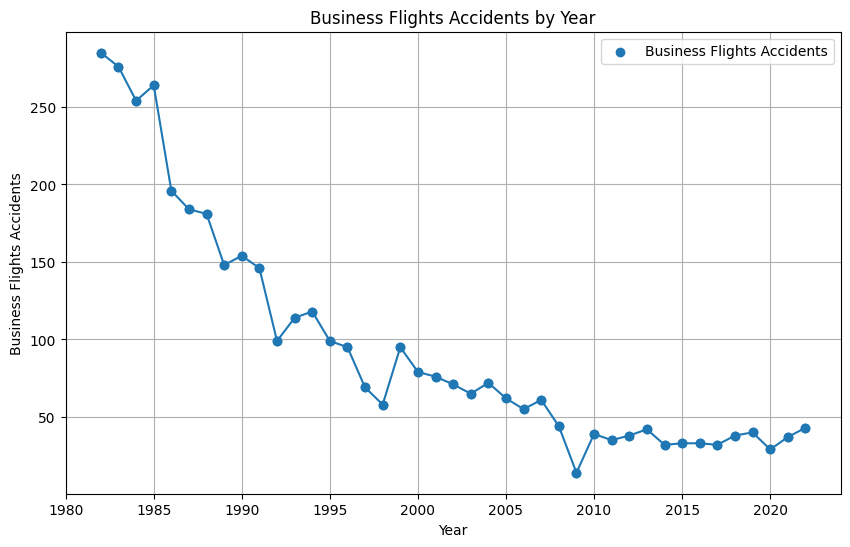

In [ ]:
# Filtering business flights
cf = df[df['Purpose of flight'] == 'Business']

#Counting accidents in each year/month
bf_years = bf.groupby('Year')['Event Id'].count().reset_index(name='count')
bf_month = bf.groupby('Month')['Event Id'].count().reset_index(name='count')

# Plotting all business flights accindets over years
x_y = bf_years['Year']
y_y = bf_years['count']

plt.figure(figsize=(10, 6))
plt.scatter(x_y, y_y, label='Business Flights Accidents')
plt.plot(x_y, y_y, linestyle='-', marker='o')  # Adding lines and markers

plt.xlabel('Year')
plt.ylabel('Business Flights Accidents')
plt.title('Business Flights Accidents by Year')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filtering by location, time and categories
cf = cf[cf['Country'] == 'United States']
cf = cf[cf['Year'] > 2005 ]
cf = cf[(cf['Aircraft Category'] == 'Airplane') |(bf['Aircraft Category'] == 'Helicopter')]

# Cleaning rows with missing values in necessary columns
cf = cf.dropna(subset=['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured'])

# Adding columns with new data
cf['Number of Passengers'] = cf['Total Fatal Injuries'] + cf['Total Serious Injuries'] + cf['Total Minor Injuries'] + cf['Total Uninjured']
cf['Survival rate'] = (cf['Total Serious Injuries'] + cf['Total Minor Injuries'] + cf['Total Uninjured']) / cf['Number of Passengers']

<ipython-input-28-ce3a18322cc8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cf = cf[(cf['Aircraft Category'] == 'Airplane') |(bf['Aircraft Category'] == 'Helicopter')]


In [ ]:
# saving dataframe for airplanes
cf_air = cf[cf['Aircraft Category'] == 'Airplane']



## Airplanes

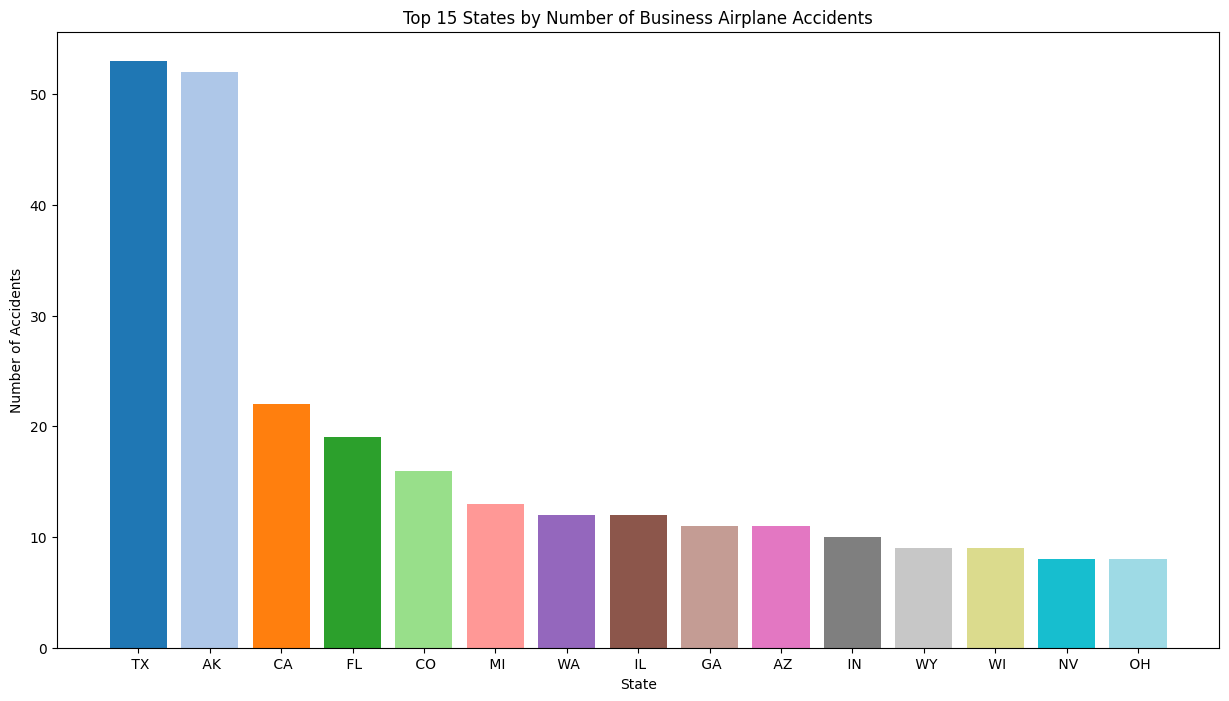

In [ ]:
# Counting accidents per state
state_counts = cf_air['State'].value_counts().reset_index()
state_counts.columns = ['State', 'count']

# Sorting and selecting top 15 states
top_15_states = state_counts.nlargest(15, 'count')
colors = plt.cm.tab20(np.linspace(0, 1, len(top_15_states)))

plt.figure(figsize=(15, 8))
plt.bar(top_15_states['State'], top_15_states['count'], color=colors)
plt.title('Top 15 States by Number of Business Airplane Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

plt.show()

In [ ]:
cf_air[]

In [49]:
group_columns = ['Make']

# Calculate the mean survival rate for each make
mean_survival_rate = cf_air.groupby(group_columns)['Survival rate'].mean().reset_index()

# Count the total number of accidents for each make
total_accidents = cf_air.groupby(group_columns).size().reset_index(name='Total accidents')

# Merge the mean survival rate and total accidents into a single DataFrame
cf_air_grouped = pd.merge(mean_survival_rate, total_accidents, on=group_columns)

# Filter out makes with less than or equal to 5 accidents and sort by 'Survival rate'
cf_air_grouped = cf_air_grouped[cf_air_grouped['Total accidents'] > 5].sort_values(by='Survival rate', ascending=False)

# Display the result
cf_air_grouped


,Make,Survival rate,Total accidents
19,Dehavilland,1.000000,10
58,Raytheon craft,0.888889,9
11,Cessna,0.815128,130
54,Piper,0.806497,59
13,Cirrus,0.750000,16
4,Beech,0.669492,59


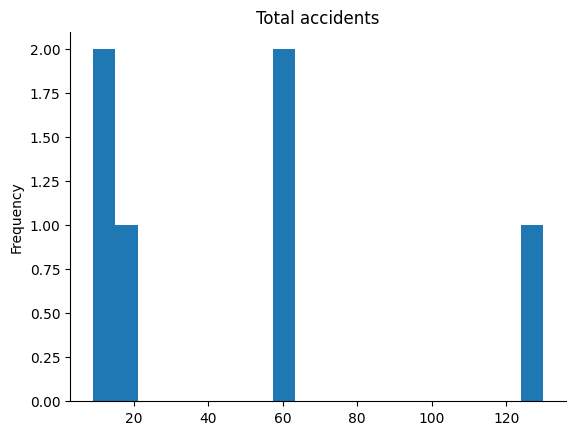

In [54]:
# @title Total accidents

from matplotlib import pyplot as plt
cf_air_grouped['Total accidents'].plot(kind='hist', bins=20, title='Total accidents')
plt.gca().spines[['top', 'right',]].set_visible(False)

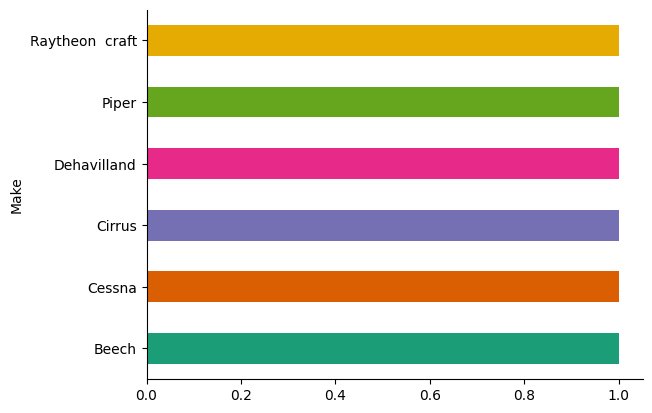

In [50]:
# @title Make
#show survival rate per make of the craft

from matplotlib import pyplot as plt
import seaborn as sns
cf_air_grouped.groupby('Make').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [55]:
# Grouping rows by Make and Year. Calculating Total accidents per Year

group_columns_ts = ['Make', 'Year']
bf_time = bf_air.groupby(group_columns_ts).size().reset_index(name="Total accidents")
bf_time

,Make,Year,Total accidents
0,Aero mmander,2013,1
1,Aero mmander,2015,1
2,Aero mmander,2019,1
3,Aero mmander,2020,1
4,Aero Vodochody,2012,1
...,...,...,...
165,Tractor,2021,1
166,Ultramagic Sa,2013,1
167,Vans craft,2021,1
168,Yuneec,2013,1


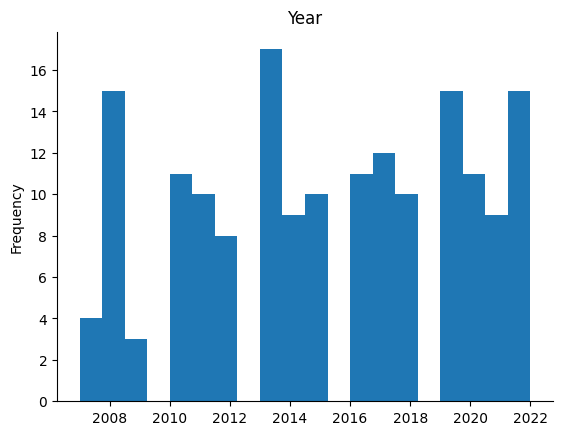

In [56]:
# @title Year

from matplotlib import pyplot as plt
bf_time['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Exploring Airplanes Models

group_columns_air_models = ['Make', 'Model', 'Year', 'Survival rate']
bf_air_models = bf_air.groupby(group_columns_air_models).size().reset_index(name="Count")
bf_air_models = bf_air_models[bf_air_models["Make"] == 'Cirrus'].sort_values(by='Survival rate', ascending=False)
bf_air_models

,Make,Model,Year,Survival rate,Count
201,Cirrus,SF50,2021,1.0,1
202,Cirrus,SF50,2022,1.0,1
203,Cirrus,SR-22,2012,1.0,1
204,Cirrus,SR20,2012,1.0,1
210,Cirrus,SR22,2013,1.0,1
211,Cirrus,SR22,2015,1.0,1
212,Cirrus,SR22,2016,1.0,2
213,Cirrus,SR22,2017,1.0,1
214,Cirrus,SR22,2019,1.0,1
215,Cirrus,SR22,2020,1.0,1


Text(0.5, 1.0, 'Total Accidents by Year for Each Make')

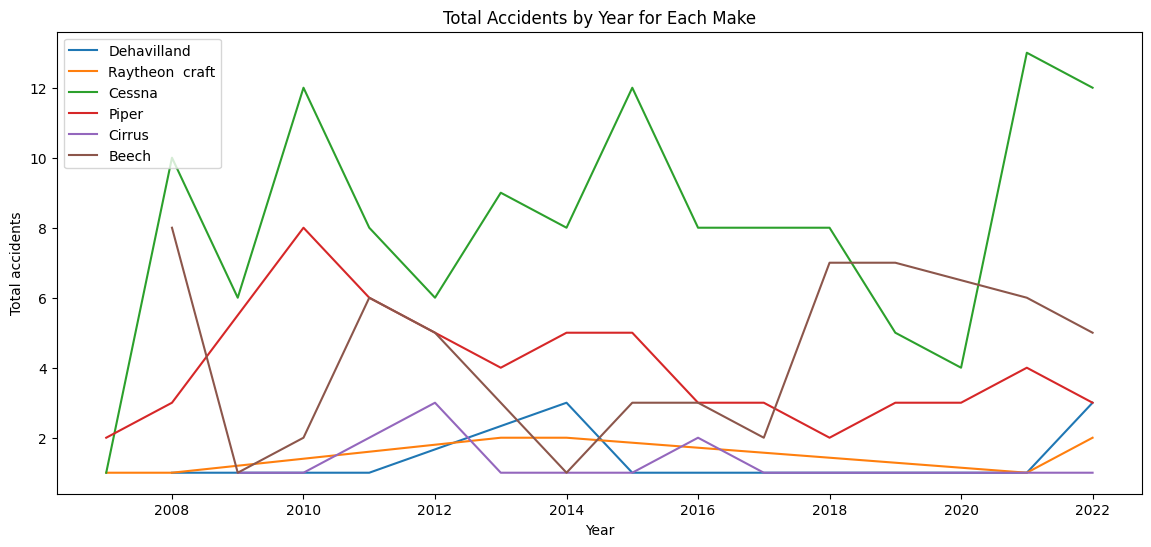

In [58]:
# Plotting total accident over years for each make

plt.figure(figsize=(14, 6))
for make in cf_air_grouped['Make'].unique():
    this_make = bf_time[bf_time['Make'] == make]
    sns.lineplot(x = this_make['Year'], y = this_make['Total accidents'], data = this_make, label=make)
plt.title('Total Accidents by Year for Each Make')


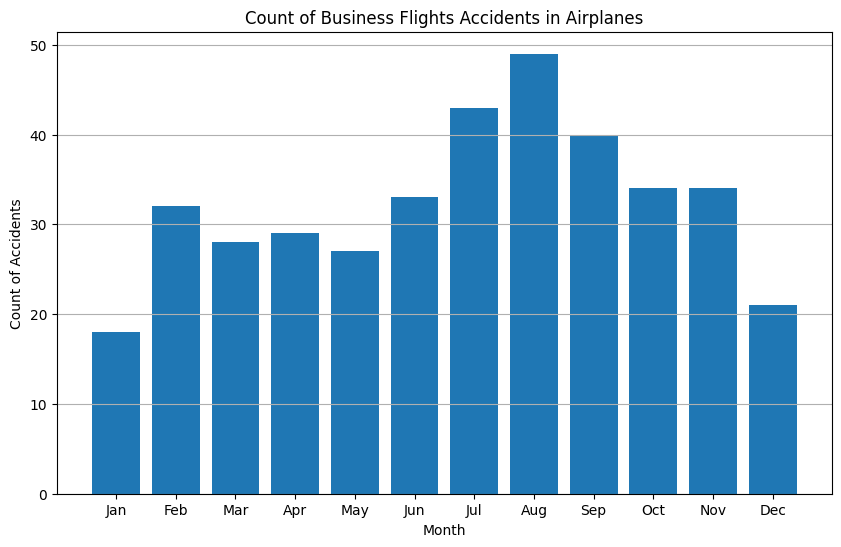

In [59]:
#Counting accidents in each month for airplanes
bf_month_air = cf_air.groupby('Month')['Event Id'].count().reset_index(name='count')

x_m = bf_month_air['Month']
y_m = bf_month_air['count']

# Plotting business flights accidents by months
plt.figure(figsize=(10, 6))
plt.bar(x_m, y_m)
plt.xlabel('Month')
plt.ylabel('Count of Accidents')
plt.title('Count of Business Flights Accidents in Airplanes')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

## Summary

Based on the analysis of the provided aviation accidents data, here are the key findings and actionable insights to help decide which aircraft to purchase for the new aviation division:

1. **Business Airplane Flights Division**:

### Summary

From the analysis of the provided aviation accident data, here are the main findings and actionable insights to guide the decision on which aircraft to purchase for the new aviation division:
#### Business Airplane Flights Division:

Prioritize when considering airplanes from following manufacturers: Piper, Cessna, Cirrus.
Airplanes Models to consider:
* Piper - M350 and M500 (formerly PA-46).
* Cessna - Citation line, Model 525 and 700.
* Cirrus - SR 22.

States with higher risk to avoid: Alaska, Texas.
July and August are higher risk months, lowest risk are December and January.

#### Risk Management
The CEO should ensure efficient Risk Assessment and insurance for allaspects related to the airplanes. These include weather forecasting, thorough and routine inspections and continuous monitoring and evaluation. This will help cushion them from extreme losses thereby maximizing the profits made.





## Nest Steps

#### **Further Analytical Steps:**

- Analyzing total flight hours to determine accident rates per flight hour or mile flown.
- Investigating if certain regions exhibit higher accident rates per flight, landing, or takeoff.
- Examining the correlation between aircraft age and accident rates.

**Potential Limitations of this Analysis:**

- Skewed results due to missing or incomplete accident reports and flight data.
- Bias towards major accidents, potentially overlooking minor incidents.
- Dataset limitation, lacking data beyond accident records.

**Additional Research for Informed Business Decisions:**

- **Market Research:** Conducting a thorough analysis of market trends and customer preferences.
- **Profitability Assessment:** Evaluating potential revenue streams and implementing effective cost management strategies.
- **Operational Feasibility Study:** Assessing logistics, safety protocols, and regulatory requirements for operational success.

#### Links

[Github repository for the project](https://github.com/dolgorp/phase1_project)

[Tableau dashborad](https://public.tableau.com/app/profile/dolgor.purbueva/viz/AviationAccidentsProject/Dashboard)